<a href="https://colab.research.google.com/github/JakeANam/AIstudy24/blob/master/%ED%99%95%EB%A5%A0%EC%A0%81%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MBC마켓의 럭키백 성공으로 인해 각각의 지역에서 수산물을 제공하기로 했다

영업팀 - 매주 7개의 생선 중 일부를 무작위로 골라 machine learning model을 학습할수 있도록 훈련 데이터 제공 중

다만, 수산물을 제공한다는 곳이 너무 많다! - sample을 골라내는 일이 쉽지 않을 때
추가되는 수산물의 sample도 없다

그래서 영업팀은 새로운 생선이 도착하는 대로 가능한 즉시 훈련 data를 제공해야 한다.


점진적 학습!
훈련data가 한번에 준비되는 것이 아니라 조금씩 전달 될때는?

해결법 1. 기존의 훈련 data에 새 data를 추가해서 매일매일 다시 훈련
- 크기가 갈 수록 커지니 시간이 더 걸릴 것 -> 시간적 여유 없어지고, 서버와 인력 늘려야한다!

해결법 2. 새로운 data를 추가할 때마다 이전 data 폐기
- 훈련 data크기를 일정하게 유지하는 방법
- 또 초기화를? 거기에 중요한게 있으면?

해결법 3. 훈련한 모델을 버리지 않고 새 data를 조금씩 학습 - 점진적 학습, 혹은 Online학습 -> 확률적 경사 하강법

In [1]:
# 확률적 경사 하강법 (가파른 길을 찾아 천천히 조금씩 내려온다)
# 확률적: 무작위, 랜덤(훈련 set에서 random하게 하나의 sample을 고른다)
# 경사 하강: 기울기가 내려가는
# 확률적 경사 하강법 - 훈련 set에서 random하게 하나의 sample을 골라 가파른 경사를 조금씩 내려가는 것을 반복해서 수행
# 만약 모든 sample을 다 사용해도 다 내려오지 못할 경우
# 처음부터 다시 시작 - 훈련set에 모든 sample을 다시 채워 넣고 다시 시작\
# 만족할만한 위치에 도달할 때 까지 계속 내려간다
# epoch: 훈련set를 한번 모두 사용하는 과정
# 일반적인 경사 하강법? - 수십,수백번 이상의 epoch를 수행

In [2]:
# 실제로 산에서 내려올 때는 가장 가파른 길을 찾아 천천히 조금씩 내려와야 한다.
# 훈련set를 사용해 model을 훈련하기 때문에 경사 하강법도 당연히 가장 가파른 길을 찾을 것!
# 다만, 전체 sampleㅇ르 사용하지 않고 딱 하나의 sampel을 훈련 set에서 random하게 골라 가장 가파른 길을 찾는 것!

# 결론: 훈련set에서 random하게 하나의 sample을 선택해서 가파른 경사를 조금씩 내려간 다음,
# 훈련set에서 random하게 또 다른 sample을 하나 선택하여 조금씩 내려간다! - 전체 sample을 모두 사용할 때 까지

# 다만, sample한개만 사용하면 너무 책임하게 내려갈 수 있고 잘못된 훈련으로 결과가 나오면 돌아갈 수 없다.

# 이런 문제점을 해소하려고 무작위로 몇 개의 sample을 선택해서 경사를 내려간다면
#  - 미니 배치 경사 하강법 - 무작위로 여러 개의 sample을 사용해서 경사 하강 진행
#  - 배치 경사 하강법 - 모든 sample을 사용해서 진행
#  다만, 이 방법으로는 한번에 전체 data를 읽을 수 없는 경우도 있으며 컴퓨터 자원을 너무 많이 사용한다
# 확률적 경사 하강법은 훈련 data가 모두 준비되어 있지 않고 자주 update되도 학습을 이어나갈 수 있다
# -> 다신 산 꼭대기부터 시작할 이유 X - 신경망 algorism 사용

In [3]:
# 손실 함수(Loss function) -> machine learning이 algorism이 얼마나 잘 되고 있는지 측정하는 기술(작을 수록 좋다) -> 이 값을 찾아서 이동
# 비용 함수(Cost function) -> 훈련set에 있는 모든 sample에 대한 손실 함수의 합
# epoch(시대) - 훈련세트를 한번 모두 사용하는 과정

In [27]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [28]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [39]:
from sklearn.model_selection import train_test_split
# import numpy as np
np.set_printoptions(precision=6, suppress=True) # 지수를 정수로 변환하기
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)
print('train_input')
print(train_input)
print(train_input.shape) # 요소 119개, 특성 5개
print('-'*50)
print('test_input')
print(test_input)
print(test_input.shape) # 요소 40개, 특성 5개

train_input
[[ 720.       35.       40.6      16.3618    6.09  ]
 [ 500.       45.       48.        6.96      4.896 ]
 [   7.5      10.5      11.6       1.972     1.16  ]
 [ 110.       22.       23.5       5.5225    3.995 ]
 [ 140.       20.7      23.2       8.5376    3.2944]
 [  69.       18.2      20.3       5.2983    2.8217]
 [ 110.       21.       22.5       5.6925    3.555 ]
 [ 620.       34.5      39.7      15.5227    5.2801]
 [ 130.       21.3      22.8       6.384     3.534 ]
 [  85.       20.       21.        5.082     2.772 ]
 [ 685.       36.5      39.       10.881     6.864 ]
 [ 500.       31.       36.2      14.3714    4.8146]
 [ 514.       32.8      34.       10.03      6.018 ]
 [ 200.       23.       25.8      10.3458    3.6636]
 [1000.       44.       46.6      12.4888    7.5958]
 [ 714.       36.       41.5      16.517     5.8515]
 [   8.7      11.3      12.6       1.9782    1.2852]
 [1000.       43.       45.2      11.9328    7.2772]
 [ 110.       20.8      23.1      

In [42]:
print('train_target')
print(train_target)
print(train_target.shape) # 요소 119개, 특성 5개
print('-'*50)
print('test_tartget')
print(test_target)
print(test_target.shape) # 요소 40개, 특성 5개

train_target
['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Perch'
 'Perch' 'Perch' 'Bream' 'Perch' 'Parkki' 'Perch' 'Bream' 'Smelt' 'Perch'
 'Roach' 'Bream' 'Pike' 'Bream' 'Pike' 'Perch' 'Parkki' 'Bream' 'Perch'
 'Pike' 'Bream' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Roach' 'Perch'
 'Bream' 'Bream' 'Perch' 'Perch' 'Roach' 'Pike' 'Perch' 'Smelt' 'Pike'
 'Roach' 'Perch' 'Parkki' 'Perch' 'Bream' 'Perch' 'Smelt' 'Perch' 'Parkki'
 'Smelt' 'Perch' 'Perch' 'Roach' 'Bream' 'Perch' 'Perch' 'Roach' 'Roach'
 'Perch' 'Perch' 'Bream' 'Roach' 'Bream' 'Roach' 'Parkki' 'Perch' 'Perch'
 'Perch' 'Perch' 'Pike' 'Pike' 'Perch' 'Bream' 'Perch' 'Bream' 'Whitefish'
 'Pike' 'Bream' 'Bream' 'Roach' 'Perch' 'Pike' 'Bream' 'Pike' 'Parkki'
 'Roach' 'Perch' 'Roach' 'Smelt' 'Whitefish' 'Roach' 'Perch' 'Bream'
 'Whitefish' 'Smelt' 'Pike' 'Roach' 'Smelt' 'Bream' 'Roach' 'Pike' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Smelt' 'Bream' 'Parkki' 'Perch'
 'Bream' 'Perch' 'Perch']
(119,)
-----

In [46]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])
print(test_scaled[:5])

[[ 0.919658  0.609432  0.810412  1.851949  1.000757]
 [ 0.300412  1.546534  1.453166 -0.469817  0.272917]
 [-1.085854 -1.68647  -1.708486 -1.701598 -2.004476]
 [-0.797341 -0.608802 -0.674869 -0.824806 -0.276315]
 [-0.712899 -0.730625 -0.700927 -0.08023  -0.703387]]
[[-0.887414 -0.918046 -1.030989 -0.904645 -0.807625]
 [-1.069247 -1.50842  -1.543455 -1.588496 -1.938032]
 [-0.544014  0.356414  0.306633 -0.81357  -0.653889]
 [-0.346981 -0.233961 -0.223205 -0.11905  -0.122335]
 [-0.684751 -0.515091 -0.588011 -0.899878 -0.50125 ]]


In [78]:
from sklearn.linear_model import SGDClassifier # 확률적 경사 하강법 method, 2개의 매개변수를 지정
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
# loss='log_loss' - logistic 손실 함수 지정
# max_iter=10 - epoch 10회 설정 - 전체 훈련 set를 10회반복 - 높게 하면 좋지만 randering 때문에 오래 걸린다
sc.fit(train_scaled, train_target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [79]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target)) # 반복횟수 부족으로 max_iter 값 올려서 훈련하자

0.773109243697479
0.775


In [80]:
# 추가할 data가 있으면?
# SGDClassifier를 또 만들지 말고 훈련할 model을 sc로 추가하여 훈련을 추가한다
sc.partial_fit(train_scaled, train_target) # 부분적인 partial 학습

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 훈련data량이 늘어나 점수가 올라갔지만 부분적인 학습을 계속하는 것은 의미X - 기준점을 제공해야한다 - 어느 시점에 data를 넣을 것인가?

0.7983193277310925
0.775


In [81]:
# epoch 와 과대/과소적합
# 확률적 경사 하강법을 사용한 model은 epoch횟수에 따라 과소, 과대적합이 될 수 있다
# epoch 횟수가 적으면 훈련 set를 덜 학습한다 (마지막 요소에서 10번만 randon 추출하고 stop)
# epoch 횟수가 충분히 많으면 훈련 set를 완전히 학습할 것
# 즉 적은 epoch 횟수 동안에 훈련된 model - 훈련set와 test set와 맞지 않는다 - 과소적합
# 반대로 epoch 횟수가 ㅁ낳은 훈련 model - 너무 잘맞아서 이런 경우 test set에서는 점수 나쁘다 - 과대적합

# 조기종료: 과대 적합이 되기 전에 훈련을 멈추는 것

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = [] # 훈련set 점수 기록
test_score = [] # test set 점수 기록
classes = np.unique(train_target)
# _ : 1회용 변수 (다시 사용 X)
for _ in range(0, 300): # 300번의 epoch동안 훈련 진행
  sc.partial_fit(train_scaled, train_target, classes=classes) # 훈련을 부분적으로 추가
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))


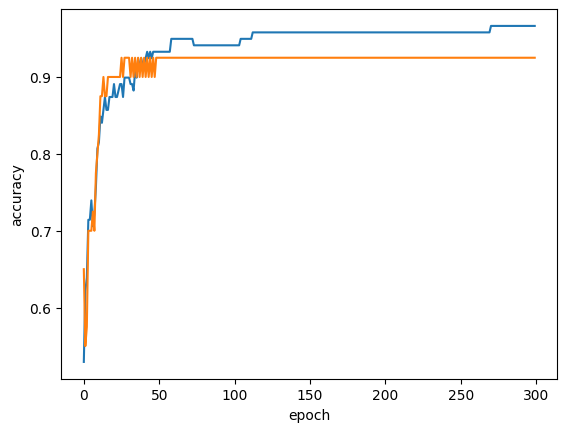

In [103]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel('accuracy')
plt.show()

In [106]:
# 확인 결과 epoch를 100 정도 돌렸을때 최상을 결과 도출
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42) # tol = None 조기종료 설정 X
# 확률적 경사 하강법은 일정 epoch동안 성능이 향상되지 않으면 더이상 훈련하지 않고 자동 정지
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=100, random_state=42, tol=None)

In [107]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [112]:
sc.predict(test_scaled[:5])
proba = sc.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.   , 0.003, 0.774, 0.   , 0.219, 0.   , 0.005],
       [0.   , 0.001, 0.015, 0.   , 0.04 , 0.945, 0.   ],
       [0.   , 0.   , 0.011, 0.96 , 0.02 , 0.008, 0.001],
       [0.   , 0.   , 0.525, 0.   , 0.423, 0.   , 0.052],
       [0.   , 0.   , 0.688, 0.   , 0.306, 0.   , 0.006]])

In [113]:
sc.classes_


array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='<U9')

In [115]:
# 손실함수에 대한 loss 매개값
# loss매개값의 기본값은 loss=hinge(hinge 손실) - support vector machine이라고도 불린다
# 또 다른 machine learning algorism을 위한 손실 함수
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 자세한 내용은 다음 참조
# https://velog.io/@lee9843/Word2Vec%EC%9D%84-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-%EC%9C%84%ED%95%9C-%EB%82%B4%EC%9A%A94-hinge-loss-%ED%9E%8C%EC%A7%80-%EC%86%90%EC%8B%A4

0.9495798319327731
0.925
